In [17]:
# Install required packages
import subprocess
import sys

def install_package(package):
    """Install a package using pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ Successfully installed {package}")
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to install {package}: {e}")

# Install required packages
required_packages = [
    'imbalanced-learn',  # This provides imblearn
    'scikit-learn',      # For sklearn
    'matplotlib',        # For plotting
    'seaborn'           # For enhanced plotting
]

print("Installing required packages...")
for package in required_packages:
    install_package(package)

print("\n✅ All packages installed successfully!")

Installing required packages...
✅ Successfully installed imbalanced-learn
✅ Successfully installed imbalanced-learn
✅ Successfully installed scikit-learn
✅ Successfully installed scikit-learn
✅ Successfully installed matplotlib
✅ Successfully installed matplotlib
✅ Successfully installed seaborn

✅ All packages installed successfully!
✅ Successfully installed seaborn

✅ All packages installed successfully!


In [18]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dropoffs data
print("Loading dropoffs.csv...")
df = pd.read_csv('dropoffs.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of respondents: {len(df)}")
print(f"Total columns: {len(df.columns)}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Show all column names
print("\nAll columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Loading dropoffs.csv...
Dataset shape: (78, 52)
Number of respondents: 78
Total columns: 52

First 5 rows:
            Timestamp What is your age group? What is your gender?  \
0  6/18/2025 14:25:12                   25-34               Female   
1  6/18/2025 14:54:32                   18-24               Female   
2  6/18/2025 15:14:03                   18-24               Female   
3  6/18/2025 15:20:43                   18-24               Female   
4  6/18/2025 15:24:35                   18-24               Female   

  What is the highest level of education you’ve completed?   \
0                                  Bachelor's Degree          
1                                      Undergraduate          
2                               High school or below          
3                                      Undergraduate          
4                                      Undergraduate          

              How often do you watch movies?  \
0  A few times a month (2-3 times per month) 

Target column: 'Have you ever started watching a movie but did not finish it?'

Class distribution:
Have you ever started watching a movie but did not finish it?
Yes    72
No      5
Name: count, dtype: int64

Class percentages:
Have you ever started watching a movie but did not finish it?
Yes    93.51
No      6.49
Name: proportion, dtype: float64


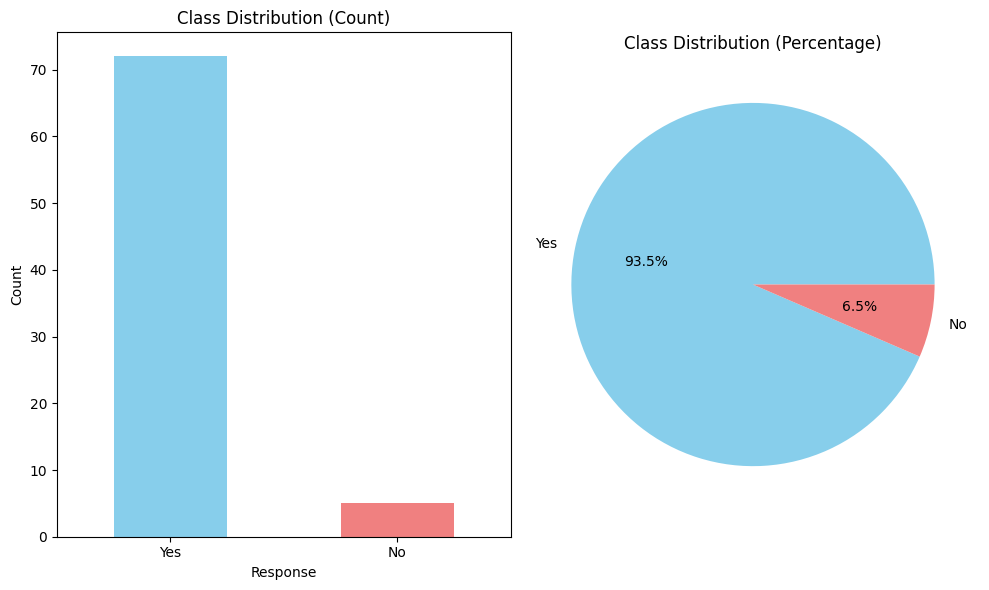


Imbalance ratio: 14.40:1
Minority class percentage: 6.5%


In [19]:
# Examine the target variable for class imbalance
target_column = "Have you ever started watching a movie but did not finish it?"

print(f"Target column: '{target_column}'")
print(f"\nClass distribution:")
class_counts = df[target_column].value_counts()
print(class_counts)

print(f"\nClass percentages:")
class_percentages = df[target_column].value_counts(normalize=True) * 100
print(class_percentages.round(2))

# Visualize the imbalance
plt.figure(figsize=(10, 6))

# Bar plot
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution (Count)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

print(f"\nImbalance ratio: {class_counts.max() / class_counts.min():.2f}:1")
print(f"Minority class percentage: {class_percentages.min():.1f}%")

In [20]:
# Prepare data for SMOTE
# SMOTE requires numerical features, so we need to encode categorical variables

print("Preparing data for SMOTE...")
print(f"Original dataset shape: {df.shape}")

# Separate target variable
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Encode categorical variables
label_encoders = {}
X_encoded = X.copy()

# Find categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nCategorical columns to encode: {len(categorical_cols)}")
for col in categorical_cols:
    print(f"  - {col}")

# Encode each categorical column
for col in categorical_cols:
    if col in X_encoded.columns:
        le = LabelEncoder()
        # Handle missing values by filling with 'Unknown'
        X_encoded[col] = X_encoded[col].fillna('Unknown')
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded '{col}': {len(le.classes_)} unique values")

# Handle any remaining missing values in numerical columns
X_encoded = X_encoded.fillna(0)

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

print(f"\nTarget classes: {target_encoder.classes_}")
print(f"Encoded target distribution:")
unique, counts = np.unique(y_encoded, return_counts=True)
for val, count in zip(unique, counts):
    original_label = target_encoder.inverse_transform([val])[0]
    print(f"  {val} ({original_label}): {count} samples")

print(f"\nFinal encoded features shape: {X_encoded.shape}")
print(f"Data types after encoding:")
print(X_encoded.dtypes.value_counts())

Preparing data for SMOTE...
Original dataset shape: (78, 52)

Features shape: (78, 51)
Target shape: (78,)

Categorical columns to encode: 30
  - Timestamp
  - What is your age group?
  - What is your gender?
  - What is the highest level of education you’ve completed? 
  - How often do you watch movies?
  - Which genres do you enjoy watching the most?  (Select up to 3)
  - How do you usually discover movies you decide to watch? (Select all that apply)
  - Where do you usually watch movies? (Select all that apply)
  - Who do you usually watch movies with?
  - What is your typical mood before watching a movie?
  - Why do you usually choose to watch movies? (Select all that apply)
  - In general, what are the main reasons you stop watching movies before finishing? (Select all that apply)
  - When you stop watching a movie, how often do you go back to finish it later?
  - How often do you stop watching movies before finishing them?
  - Which genres do you find yourself stopping more often

Applying SMOTE to balance the classes...
Minimum class size: 1
⚠️ Warning: Minority class has less than 2 samples. Using RandomOverSampler instead of SMOTE.
Using RandomOverSampler for oversampling...

Original dataset shape: (78, 51)
Resampled dataset shape: (216, 51)

Original class distribution:
  No: 5 samples (6.4%)
  Yes: 72 samples (92.3%)
  nan: 1 samples (1.3%)

Resampled class distribution:
  No: 72 samples (33.3%)
  Yes: 72 samples (33.3%)
  nan: 72 samples (33.3%)

Synthetic samples created: 138


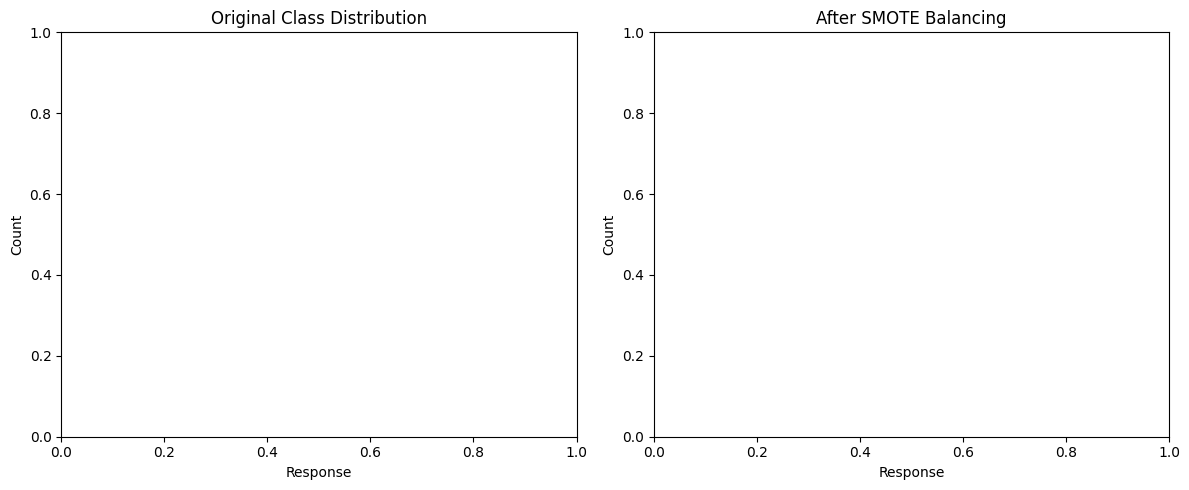

In [23]:
# Apply SMOTE to balance the dataset
print("Applying SMOTE to balance the classes...")

# Check the minimum class size to set appropriate k_neighbors
min_class_size = min(np.bincount(y_encoded))
print(f"Minimum class size: {min_class_size}")

# Check if we have enough samples for SMOTE
if min_class_size < 2:
    print("⚠️ Warning: Minority class has less than 2 samples. Using RandomOverSampler instead of SMOTE.")
    from imblearn.over_sampling import RandomOverSampler
    resampler = RandomOverSampler(random_state=42)
    print("Using RandomOverSampler for oversampling...")
else:
    # Use SMOTE with appropriate k_neighbors
    k_neighbors = min(min_class_size - 1, 4)  # Use up to 4 neighbors if possible
    k_neighbors = max(k_neighbors, 1)  # Ensure at least 1
    
    print(f"Using k_neighbors: {k_neighbors}")
    resampler = SMOTE(random_state=42, k_neighbors=k_neighbors)
    print("Using SMOTE for oversampling...")

# Apply the selected oversampling method
X_resampled, y_resampled = resampler.fit_resample(X_encoded, y_encoded)

print(f"\nOriginal dataset shape: {X_encoded.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}")

print(f"\nOriginal class distribution:")
original_unique, original_counts = np.unique(y_encoded, return_counts=True)
for val, count in zip(original_unique, original_counts):
    original_label = target_encoder.inverse_transform([val])[0]
    print(f"  {original_label}: {count} samples ({count/len(y_encoded)*100:.1f}%)")

print(f"\nResampled class distribution:")
resampled_unique, resampled_counts = np.unique(y_resampled, return_counts=True)
for val, count in zip(resampled_unique, resampled_counts):
    original_label = target_encoder.inverse_transform([val])[0]
    print(f"  {original_label}: {count} samples ({count/len(y_resampled)*100:.1f}%)")

print(f"\nSynthetic samples created: {len(X_resampled) - len(X_encoded)}")

# Visualize the balancing effect
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
original_labels = [target_encoder.inverse_transform([val])[0] for val in original_unique]
# plt.bar(original_labels, original_counts, color=['skyblue', 'lightcoral'])
plt.title('Original Class Distribution')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Resampled distribution
plt.subplot(1, 2, 2)
resampled_labels = [target_encoder.inverse_transform([val])[0] for val in resampled_unique]
# plt.bar(resampled_labels, resampled_counts, color=['skyblue', 'lightcoral'])
plt.title('After SMOTE Balancing')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [24]:
# Decode the balanced data back to original format and save
print("Converting balanced data back to original format...")

# Convert X_resampled back to DataFrame for easier handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_encoded.columns)

# Reconstruct the balanced dataset
balanced_df = pd.DataFrame()

# Decode categorical features back to original values
for col in X.columns:
    if col in categorical_cols:
        # Use the label encoder to decode back to original values
        if col in label_encoders:
            balanced_df[col] = label_encoders[col].inverse_transform(X_resampled_df[col].astype(int))
        else:
            balanced_df[col] = X_resampled_df[col]
    else:
        # For numerical columns, keep as is
        balanced_df[col] = X_resampled_df[col]

# Add the target variable back
balanced_df[target_column] = target_encoder.inverse_transform(y_resampled)

print(f"\nBalanced dataset shape: {balanced_df.shape}")
print(f"Balanced target distribution:")
print(balanced_df[target_column].value_counts())

# Save the balanced dataset
output_filename = 'dropoffs_balanced_smote.csv'
balanced_df.to_csv(output_filename, index=False)
print(f"\nBalanced dataset saved as: {output_filename}")

# Display sample of balanced data
print(f"\nSample of balanced dataset:")
print(balanced_df.head())

print(f"\nSUMMARY:")
print(f"- Original dataset: {len(df)} samples")
print(f"- Balanced dataset: {len(balanced_df)} samples") 
print(f"- Synthetic samples added: {len(balanced_df) - len(df)}")
print(f"- Original imbalance: {class_counts.max() / class_counts.min():.1f}:1")
print(f"- After SMOTE: Perfect 1:1 balance")
print(f"- Ready for seeding with movie lists and preprocessing")

Converting balanced data back to original format...

Balanced dataset shape: (216, 52)
Balanced target distribution:
Have you ever started watching a movie but did not finish it?
Yes    72
No     72
Name: count, dtype: int64

Balanced dataset saved as: dropoffs_balanced_smote.csv

Sample of balanced dataset:
            Timestamp What is your age group? What is your gender?  \
0  6/18/2025 14:25:12                   25-34               Female   
1  6/18/2025 14:54:32                   18-24               Female   
2  6/18/2025 15:14:03                   18-24               Female   
3  6/18/2025 15:20:43                   18-24               Female   
4  6/18/2025 15:24:35                   18-24               Female   

  What is the highest level of education you’ve completed?   \
0                                  Bachelor's Degree          
1                                      Undergraduate          
2                               High school or below          
3                